In [31]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


In [32]:
df = pd.read_csv('pd_speech_features.csv',header=1)

In [33]:
X=df.drop(['class','id'],axis = 1)
y = df['class']

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_smote, y_smote = smote.fit_resample(X, y)

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(X, y):
  X_train= X.loc[train_index]
  y_train = y.loc[train_index]
  X_test = X.loc[test_index]
  y_test =y.loc[test_index]

In [36]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(X_smote, y_smote):
  X_sm= X_smote.loc[train_index]
  y_sm = y_smote.loc[train_index]
  X_test_sm = X_smote.loc[test_index]
  y_test_sm =y_smote.loc[test_index]

In [37]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_sm_std = pd.DataFrame(std.fit_transform(X_sm),columns = X_train.columns)
X_test_std_sm = pd.DataFrame(std.transform(X_test_sm),columns = X_test.columns)
std2=StandardScaler()
X_std= pd.DataFrame(std2.fit_transform(X_train),columns = X_train.columns)
X_test_std = pd.DataFrame(std2.transform(X_test),columns = X_test.columns)

# SVM

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [39]:
cv = RepeatedKFold(n_splits=5, n_repeats=3)


In [40]:
params_grid = [
    {'kernel':['rbf'],'gamma':['scale',1,10,0.1,100],'C':[1,10,100],'decision_function_shape':['ovo','ovr']},
    {'kernel':['poly'],'degree':[2,3,4],'C':[0.1,1,10,100,1000],'decision_function_shape':['ovo','ovr']}
]

In [41]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [42]:
SVM_GS =GridSearchCV (svc,params_grid,cv = cv,scoring =['f1','precision','recall','accuracy'],return_train_score = True,refit = 'accuracy')

In [ ]:
SVM_GS.fit(X_sm_std,y_sm)

In [44]:
SVM_GS.best_score_

0.9362009191324681

In [45]:
SVM_GS.best_params_

{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}

In [46]:
from sklearn.metrics import  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [47]:
scores = ['mean_test_accuracy','mean_test_recall','mean_test_f1','mean_test_precision']
for i in scores:
  print(i)
  print(SVM_GS.cv_results_[i][SVM_GS.best_index_])

mean_test_accuracy
0.9362009191324681
mean_test_recall
0.9176579451209032
mean_test_f1
0.9342602701811759
mean_test_precision
0.9519882866549814


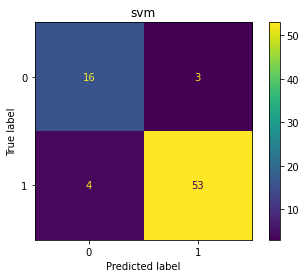

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test,SVM_GS.best_estimator_.predict(X_test_std))
plt.title("svm")
plt.show()

In [49]:
y_predicted = SVM_GS.best_estimator_.predict(X_test_std)
print('accuracy:')
print(accuracy_score(y_test,y_predicted))
print('precision')
print(precision_score(y_test,y_predicted))
print('recall')
print(recall_score(y_test,y_predicted))
print('f')
print(f1_score(y_test,y_predicted))

accuracy:
0.9078947368421053
precision
0.9464285714285714
recall
0.9298245614035088
f
0.9380530973451328


In [50]:
svc2 = SVC(random_state=42)
SVM2_GS =GridSearchCV (svc2,params_grid,cv = cv,scoring =['f1','precision','recall','accuracy'],return_train_score = True,refit = 'accuracy')

In [51]:
SVM2_GS.fit(X_std,y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'gamma': ['scale', 1, 10, 0.1, 100],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'degree': [2, 3, 4], 'kernel': ['poly']}],
             refit='accuracy', return_train_score=True,
             scoring=['f1', 'precision', 'recall', 'accuracy'])

In [52]:
SVM2_GS.best_score_

0.8867647058823529

In [53]:
SVM2_GS.best_params_

{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}

In [54]:
for i in scores:
  print(i)
  print(SVM2_GS.cv_results_[i][SVM2_GS.best_index_])

mean_test_accuracy
0.8867647058823529
mean_test_recall
0.9640892039465516
mean_test_f1
0.9268792450601595
mean_test_precision
0.8927716267333171


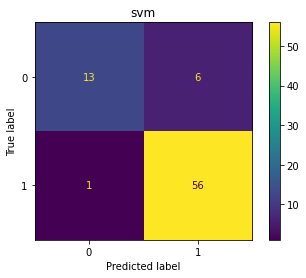

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test,SVM2_GS.best_estimator_.predict(X_test_std))
plt.title("svm")
plt.show()

In [56]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_predicted = SVM2_GS.best_estimator_.predict(X_test_std)
print('accuracy:')
print(accuracy_score(y_test,y_predicted))
print('precision')
print(precision_score(y_test,y_predicted))
print('recall')
print(recall_score(y_test,y_predicted))
print('f')
print(f1_score(y_test,y_predicted))

accuracy:
0.9078947368421053
precision
0.9032258064516129
recall
0.9824561403508771
f
0.9411764705882352


# XGBoost

In [48]:
from xgboost.sklearn import XGBClassifier

In [69]:
xgb = XGBClassifier(n_estimators=100)

In [70]:
params_grid = {'max_depth':[4,5,6,7,8,10,12]}

In [71]:
xgb_GS =GridSearchCV (xgb,params_grid,cv = cv,scoring =['f1','precision','recall','accuracy'],return_train_score = True,refit = 'accuracy')

In [72]:
xgb_GS.fit(X_sm_std,y_sm)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=XGBClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 10, 12]},
             refit='accuracy', return_train_score=True,
             scoring=['f1', 'precision', 'recall', 'accuracy'])

In [73]:
xgb_GS.best_score_

0.9281813539735011

In [74]:
xgb_GS.best_params_

{'max_depth': 7}

In [75]:
for i in scores:
  print(i)
  print(xgb_GS.cv_results_[i][xgb_GS.best_index_])

mean_test_accuracy
0.9281813539735011
mean_test_recall
0.9159874412177785
mean_test_f1
0.9268728651989014
mean_test_precision
0.9393324838995255


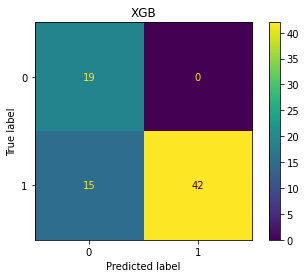

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test,xgb_GS.best_estimator_.predict(X_test_std))
plt.title("XGB")
plt.show()

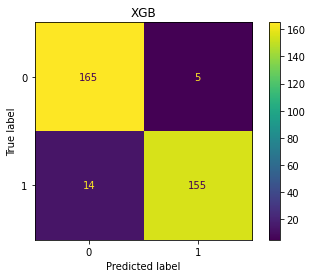

In [81]:
ConfusionMatrixDisplay.from_predictions(y_test_sm,xgb_GS.best_estimator_.predict(X_test_std_sm))
plt.title("XGB")
plt.show()

In [82]:
y_predicted = xgb_GS.best_estimator_.predict(X_test_std)
print('accuracy:')
print(accuracy_score(y_test,y_predicted))
print('precision')
print(precision_score(y_test,y_predicted))
print('recall')
print(recall_score(y_test,y_predicted))
print('f')
print(f1_score(y_test,y_predicted))

accuracy:
0.8026315789473685
precision
1.0
recall
0.7368421052631579
f
0.8484848484848484


In [83]:
xgb2 = XGBClassifier(n_estimators=100)

In [84]:
xgb2_GS =GridSearchCV (xgb2,params_grid,cv = cv,scoring =['f1','precision','recall','accuracy'],return_train_score = True,refit = 'accuracy')

In [86]:
xgb2_GS.fit(X_std,y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=XGBClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 10, 12]},
             refit='accuracy', return_train_score=True,
             scoring=['f1', 'precision', 'recall', 'accuracy'])

In [87]:
xgb2_GS.best_score_

0.8882352941176472

In [88]:
xgb2_GS.best_params_

{'max_depth': 5}

In [89]:
for i in scores:
  print(i)
  print(xgb2_GS.cv_results_[i][xgb2_GS.best_index_])

mean_test_accuracy
0.8882352941176472
mean_test_recall
0.9754221828694569
mean_test_f1
0.9288199871754063
mean_test_precision
0.8870865710214225


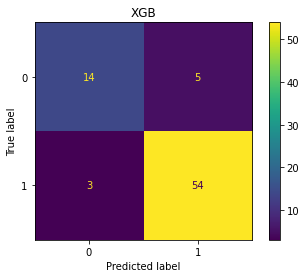

In [90]:
ConfusionMatrixDisplay.from_predictions(y_test,xgb2_GS.best_estimator_.predict(X_test_std))
plt.title("XGB")
plt.show()

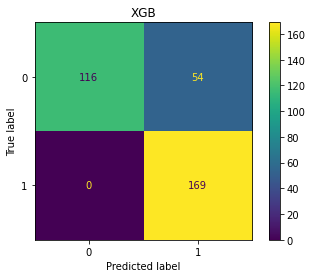

In [91]:
ConfusionMatrixDisplay.from_predictions(y_test_sm,xgb2_GS.best_estimator_.predict(X_test_std_sm))
plt.title("XGB")
plt.show()

In [92]:
y_predicted = xgb2_GS.best_estimator_.predict(X_test_std)
print('accuracy:')
print(accuracy_score(y_test,y_predicted))
print('precision')
print(precision_score(y_test,y_predicted))
print('recall')
print(recall_score(y_test,y_predicted))
print('f')
print(f1_score(y_test,y_predicted))

accuracy:
0.8947368421052632
precision
0.9152542372881356
recall
0.9473684210526315
f
0.9310344827586206


# ELM

In [15]:
from skelm import ELMClassifier

In [14]:
!pip install scikit-elm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
y_sm = np.array(y_sm)
X_sm_std = np.array(X_sm_std)
from sklearn.model_selection import KFold
acc=[]
precision= []
f1= []
recall=[]
for i in range(5):

        kf = KFold(n_splits=5, random_state=42,shuffle=True)
        for train_index, test_index in kf.split(X_sm_std):
          X_train_folds = X_sm_std[train_index]
          y_train_folds = y_sm[train_index]
          X_val_fold = X_sm_std[test_index]
          y_val_fold = y_sm[test_index]
          elm =ELMClassifier(alpha=0.1, n_neurons=(100, 200, 300, 1000), ufunc='sigm')
          elm.fit(X_train_folds,y_train_folds)
          y_predictions = elm.predict(X_val_fold)
          acc.append(accuracy_score(y_val_fold, y_predictions))
          precision.append(precision_score(y_val_fold, y_predictions))
          f1.append(f1_score(y_val_fold, y_predictions))
          recall.append(recall_score(y_val_fold, y_predictions))

In [30]:
print('accuracy')
print(np.mean(acc))
print('precision')
print(np.mean(precision))
print('f1')
print(np.mean(f1))
print('recall')
print(np.mean(recall))

accuracy
0.8603225026203338
precision
0.9414823428387195
f1
0.8439154089255179
recall
0.765859172803769


In [171]:
y_predicted = elm.predict(X_test_std)
print('accuracy:')
print(accuracy_score(y_test,y_predicted))
print('precision')
print(precision_score(y_test,y_predicted))
print('recall')
print(recall_score(y_test,y_predicted))
print('f')
print(f1_score(y_test,y_predicted))

accuracy:
0.9342105263157895
precision
1.0
recall
0.9122807017543859
f
0.9541284403669724


In [154]:
elm2 = ELMClassifier(n_neurons=(50, 100, 300, 1000),ufunc = 'sigm',alpha = 0.1)

In [155]:
elm2.fit(X_std,y_train)

ELMClassifier(alpha=0.1, n_neurons=(50, 100, 300, 1000), ufunc='sigm')

In [156]:
y_predicted = elm2.predict(X_test_std)
print('accuracy:')
print(accuracy_score(y_test,y_predicted))
print('precision')
print(precision_score(y_test,y_predicted))
print('recall')
print(recall_score(y_test,y_predicted))
print('f')
print(f1_score(y_test,y_predicted))

accuracy:
0.7894736842105263
precision
0.8596491228070176
recall
0.8596491228070176
f
0.8596491228070176


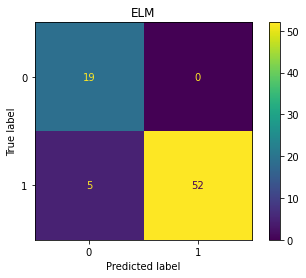

In [172]:
ConfusionMatrixDisplay.from_predictions(y_test,elm.predict(X_test_std))
plt.title("ELM")
plt.show()